# **Module 1: Basic Statistics in Python**

In this module, you will learn how to

1. Read data into a Python notebook
2. Inspect Data
2. Conduct an Exploratory Data Analysis (EDA) with Basic Statistics
2. Program a 5 number summary
2. Build a few basic plots

**Be sure to expand all the hidden cells, run all the code, and do all the exercises--you will need the techniques for the lesson test!**

##1. Setting up a Python Notebook and Reading Data into it

As with many programming languages, the first thing you do is to call all of the libraries that you are going to use. In Python, these are called "packages." For analytics, there is a standard set of packages that you should always consider loading first. I like to call them The Big Three because you can do almost anything with them.


1.   **NumPy**: The fundamental package for scientific computing; used for working with arrays. Read more about it on [the official NumPy page](https://numpy.org/)!
2.   **Pandas**: The Python Data Analysis library. Here is [the official page](https://pandas.pydata.org/).
3.   **matplotlib**: A very powerful graphics (aka data visualization) package. Take a look at the documentation and examples [here](https://matplotlib.org/).

To import a library (or "package"), simply use the *import* command--and since always typing the name of the library when you want to call it is a waste of time, let's alias it with *as*. Check it out below (and be sure to always click the black circle with the white "play" triangle on it to the left of the code):


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Next, we are using the pandas library to read data into our notebook. It's easiest to store this data on your GitHub account. When you display the data on your GitHub account, click "raw" to display it in .csv format and copy the URL into the function call like I am doing below with the simplified adult dataset. The dataframe we are building is called "adult."

In [3]:
adult = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/adult.data.simplified25.csv")

#2. Inspecting Data#
Of course, you also want to see the data with which you are working, so you'll want to display it.


*   `adult` displays all the data in your browser. Really. All. The. Data. That can be a lot.
*   `adult.head(5)` will display the first 5 rows. Try it out!
*   `adult.tail(7)` will display the last 7 rows. Try that out, too!

To see the different options, uncomment (i.e., remove the #) the first one below, then run the cell, and re-comment the one you just tried. Then uncomment the next one, try it, and so on.



In [ ]:
adult
# adult.head(5)
# adult.tail(7)

The commands above show you all the columns. But what if you want to see only specific columns of data? That's when you use [*select_dtypes()*](https://www.geeksforgeeks.org/python-pandas-dataframe-select_dtypes/). Here's how to use select_dtypes():


*   `df.select_dtypes('O') `-- show all columns with string values
*   `df.select_dtypes('int')` -- show all columns with whole numbers
*   `df.select_dtypes('float64')` -- show all columns with floating point values
*   `df.select_dtypes('bool')` -- show all columns with
'True" or False" values


Instead of df, use the name of the dataframe you have just created, like this:



Now, edit the line above to see all the columns with whole numbers, and then all the columns with floating point values.

Lastly, often, empty rows or rows with missing data can megatively impact the resuts you are getting. They can, infact,stop some of our algorithms from running. So, let's clean them up with

`df.dropna(inplace = True)`

Now, type the code below to do this on the adult dataset (note: You will need to replace *df* with *adult*)

In [10]:
adult.dropna(inplace=True)

# 3. Exploratory Data Analysis (aka Basic Statistics)#
Very often, businesses require that you look at numeric averages, find the highest and lowest or the first and last values, the number of rows, the number of unique values, the middle value and how many values are above and below it, that kind of thing. This is called **Exploratory Data Analysis or EDA**. That's why it is important to know how to find these basic statistics. The commands are:

* count() --           Total number of items
* min(), max() --      Minimum and maximum
* first(), last() --   First and last item
* mean(), median() --  Mean (=average) and median (middle number, aka 50th percentile)
* sum()   --           Sum of all items
* std(), var() --      Standard deviation and variance

Let's see some of these in action!


In [ ]:
adult.count()

NOTE how the values in each row are counted--super useful if you want to quickly see if there are any missing values. Here, all counts are the same, so no values are missing.

In [ ]:
adult.min()

Here, you see the smallest values in each column. How, use the line below to find the largest rows in each column!

Now, find the first and the last values in each column:

What about the average and the middle values?

You have seen that, with the commands above you can find the mean and the median for all values in the dataset. With really large datasets, the amount of memory that can use may make your computer crash. If you are looking for the mean and median for a specific column only, just be explicit, like this:



* `df.attribute.mean()`
* `df.attribute.median()`

Here is how this works with the 'age' attribute:

In [ ]:
adult.age.mean()

Now, try this with the median:

And the sum of all the ages?

Lastly, find the standard deviation for the age attribute:

#4. There's got to be a Simpler Way--5-number Summary#
Good programmers (and data analysts) always look for ways to simplify what they do. Why use 5 commands if you can use just one in order to generate a perfectly good 5-number summary?

**NOTE:** A 5-number summary usually tells you everything you need to know in order to form a first opinion about a data set. It usually includes the most important **Measures of Aggregation** (mean, median, min, max, range, mode) and some **Measures of Distribution** (like the standard deviation).

If you aren't quite sure about any of these terms, the awesome video below  explains the 5 numbers really well.

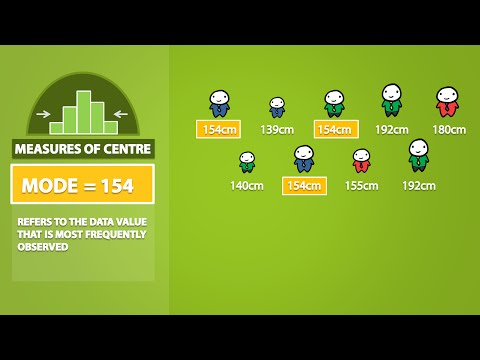

In [14]:
from IPython.display import YouTubeVideo # This is the library I am calling to show you the YouTube video below
YouTubeVideo('mk8tOD0t8M0')

In Python, the easiest way to produce a 5-number summary is with `describe()`. If you want to look at all the attributes, tell Python to `include = 'all'`, as in the example below:


In [ ]:
adult.describe(include='all')

That's a lot of information right there! You get your basic 5-number summary (mean, median, mode, range, standard deviation) and then some really important information that is going to be useful later:

* **unique** -- how many unique values are in that column. These are the **categories** or **factors** used in the column (like "married", "divorced", ... that kind of thing)
* **top** -- the most frequently occurring string in an object-data column
* **freq** -- the frequency of the most commonly occurring string in an object-data column

For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

Do you see all the NaN values in the object columns? That's because you can't do any math with strings other than count them.

So, let's look at just the numeric attributes:

In [ ]:
adult.describe()

And now let's look at just the object attributes:

In [ ]:
adult.describe(include=['O'])

And, as before, we can narrow our investigations down to just one attribute. Here, we're looking at the age attribute and at the education attribute:

In [ ]:
adult.age.describe()

In [ ]:
adult.education.describe()

#5. Grouping Data By Categories#
Grouping is another one of the basic data investigation tools. We will use the `groupby` operator. It splits a dataset into the categories we specify, then applies whatever functions we tell it to apply, and then combines the results for each group in the output.

Explanations are now in comments in the code lines.

In [ ]:
# Using groupby to aggregate the data by one of the attributes, here sex.
# All this produces is another object, not something that's really useful to us.
adult.groupby(['sex'])

In [ ]:
# Let's use groupby with an actual aggregating function like sum(); to make sure we sum only the numeric values, we need to specify numeric_only = True
adult.groupby(['sex']).sum(numeric_only = True)

In [ ]:
# Let's use groupby with another aggregating function because WHOA! Interesting results!
# Let's add more columns to the array!
adult.groupby(['educationyears','sex']).median(numeric_only = True)

##Just because you can, should you?##
Does it really make sense to build a summary of everyone's age, as we did above? Or what about summarizing all the student ID numbers in a course?

You guessed it!

One of the most important aspects of succeeding in this course (and as a data analyst) is **CRITICAL THINKING**.  So if your code works ... well ... that's nice (and expected)--but does it make sense to do the analysis you're doing in the first place?

So, just because you know how to write the code, should you use it every time and everywhere?

The answer to that is, obviously, no (or rather, my favorite: "It depends.")

NOTE that, when looking at data, it's important to **evaluate** whether your actions make sense. Don't waste your employer's expensive computing resources if you don't have to!

# 6. Making Basic Plots
What gives you a faster overview of data? A summary table like what you've produced above, or a simple picture?

Honestly, that was a rhetorical question. In the real world, where information travels at a mile a minute, executive managers often don't have time to read tables and make sense of the data themselves. That's your job--and how well you set up an information dashboard can determine much of your paycheck. Incidentally, that makes **COMMUNICATION SKILLS** (listening, asking the right questions, and knowing your audience) one of the most important characteristics of a good Data Analyst.

Some plots are really **low-information**, like pie charts or dials (ugh!)--but they give you a good visual of the data distribution in one attribute. You get more useful information out of histograms, line plots, dials, or the nerdy magic of boxplots. Believe it or not, these **high-information** plots are also easier to build. We'll start with those.

##6.1 Boxplots
Boxplots are essentially your 5-number summary in graphical form. The box itself consists of the 25th (lower bound), 50th (median), and 75th (upper bound) percentile. The distance from the 25th percentile to the 75th percentile is also called the Interquartile Range (or IQR). The lines pointing beyond the box are called whiskers; they connect the box to the maximum or minimum--unless there are outliers, which has the lower whisker end at minimum plus 1.5*IQR and the upper whisker at the maximum minus 1.55*IQR. Why 1.5?

If you need more information to understand boxplots, check out [Khan Academy](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review). If you want to learn more advanced information about boxplots, [this page](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51) on towarddatascience is great.

In [ ]:
# Using the simple pandas boxplot function. As you will see, the y axis for income put the plot out of proportion
adult.boxplot()

In [ ]:
# Let's look at just age and education years
adult.boxplot(['age','educationyears'])

In [ ]:
# What if we look at age by education?
adult.boxplot(column='age',by='education')

In [ ]:
# Matplotlib uses fig and ax and allows you more control over the formatting of the plot
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(adult.age)
# ax1.boxplot(adult.age, notch=True)  # Shows a notch around the median
# ax1.bloxplot(adult.age, notch=True, showfliers=False)  # Removes the outliers

In [ ]:
# Make the outliers pretty
green_diamond = dict(markerfacecolor='g', marker='D')
fig2, ax2 = plt.subplots()
ax2.set_title('Changed Outlier Symbols')
ax2.boxplot(adult.age, flierprops=green_diamond)

In [ ]:
#Flip the plot
red_square = dict(markerfacecolor='r', marker='s')
fig3, ax3 = plt.subplots()
ax3.set_title('Horizontal Boxes')
ax3.boxplot(adult.age, vert=False, flierprops=red_square)

##6.2 Histograms
Histograms are a little lower information than boxplots. They are the visual representation of the `groupby` operator and show you simple data distribution.

In [ ]:
# The simplest histogram--plt.hist divides the range into 10 even bins for easier plotting.
# The output shows how the bin cutoffs were set. The long form of writing this would be plt.hist(adult.age); the short form works, too
adult.age.hist()

In [ ]:
# The humber of bins can be adjusted. Here, we are setting bins of 20 and labeling x and y, along with titling the plot.
plt.hist(adult.age,bins=20)
plt.ylabel('Count')
plt.xlabel('age')
plt.title('Age Plot')
plt.show()

In [ ]:
# We can show all the numeric categories really easily
adult.hist()

In [ ]:
# And we can subdivide the categories by another, just like the hierarchical groupby you have seen above.
adult.hist(column='age',by='education')

##6.3 Different Ways of Building Scatter Plots
Scatter plots show you counts of data. The fastest way of building scatter plots is with `plt.scatter()`, but there are [many fancy ways](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to play with colors and even animation.

In [ ]:
# Setting up the x and y axes of the plot
x = adult[('age')]
y = adult[('education')]

# Building the plot with red outlines for better visibility
plt.scatter(x, y, edgecolors='r')

# NO PLOT WITHOUT LABELS AND TITLE--EVER!!!!!!!
plt.xlabel('Content of x axis (age)')
plt.ylabel('Content of y axis (education)')
plt.title('This is the plot title (Age vs Education)')
plt.show()

##6.4 Pie Charts and Dials##
You came here for the pie charts, didn't you?

Pie charts are the lowest of the low-information graphs--but they also exist in any spreadsheet application and are easy to build, so many people are used to the format already. The information is easily digestible, which makes them one of management's favorite tools.

* Pie charts display CATEGORICAL data in counts per category for one attribute.
* Dials display ORDINAL data in ordered counts per category for one attribute.

In actual Data Science, pie charts and dials are only a first step to data analysis, but never the last step. Always know your audience.

More information about pie charts and how to build them is [here](https://towardsdatascience.com/pie-charts-in-python-302de204966c). Believe it or not, the code is quite involved. We'll leave it for later.

#7. Your Turn!#
Use the code field(s) below to run your own code on the adult dataset, based on the test questions that you are getting!